<a href="https://colab.research.google.com/github/rodrigosilvacio/aws-repository/blob/main/Tech_Challenge_Fase_2_Grupo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**TECH CHALLENGE 2**

####Os modelos preditivos a seguir tem como objetivo prever o fechamento diário da pontuação do IBOVESPA utilizando séries temporais. Neles, descrevemos o passo a passo de como chegamos no resultado final assim como as conclusões de cada etapa.

####Os modelos utilizados foram: Naive, ARIMA, AUTO ARIMA, SARIMA e Prophet. Ao final, elencamos desses qual teve o melhor desempenho a partir dos resultados observados


#Importando e Instalando Bibliotecas#

#####Para alcançarmos nosso objetivo, instalamos e importamos as ferramentas certas para o trabalho:
* Statsforecast, Statsmodels e Prophet nos permitem acesso aos modelos preditivos de ponta;
* Pandas e Numpy para tratamento e manipulação dos dados;
* Matplotlib e Seaborn para visualização dos dados;
* Statsmodels, acf e pacf para fazer análises estatísticas, identificando padrões e validando hipóteses;
* Sklearn.metrics nos ajuda a assegurar previsões precisas

Assim, estamos prontos para iniciar os trabalhos

In [ ]:
!pip install statsforecast
!pip install prophet

In [ ]:
#import investpy as inv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from pandas.tseries.offsets import Day
from statsmodels.tsa.arima.model import ARIMA
from statsforecast import StatsForecast
from statsforecast.models import ARIMA
from itertools import product
import seaborn as sns



import warnings
warnings.filterwarnings("ignore")


#Extração dos dados#

#####Iniciamos coletando e tratando os dados que vamos usar no projeto, de acordo com as células dos códigos, seguimos o seguinte racional:

*   Importamos os dados do Ibovespa (2015-2025), trazendo informações essenciais sobre a performance do mercado.
*   Convertemos a coluna de datas para um formato adequado e definindo-a como índice, garantimos que as análises respeitem a ordem cronológica em um formato ideal para trabalhar com séries temporais.
*   Renomeamos a coluna de preços para "Fechamento", tornando os dados mais intuitivos e fáceis de interpretar.
*   Criamos um novo conjunto contendo apenas os valores de fechamento, multiplicamos por 1000 para evitar erros de precisão e convertemos para números inteiros.

Com isso, temos um banco de dados limpo e estruturado, pronto para gerar insights valiosos e embasar decisões estratégicas com mais segurança.



In [ ]:
# Criamos o dataframe bovespa que receberá a série histórica

In [ ]:
bovespa=pd.read_csv('dados_historicos_Ibovespa_2015_a_2025.csv')

In [ ]:
# Verificando as primeiras linhas do dataframe, especificamente olharemos as 30 ultimas dias (período que será utilizado para validação dos modelos)
# reparamos que a Ibovespa não tem fechamento em finais de semana e feriados.

# os feriados que não estão na nossa base em 2025 : 03/02 e 04/02

bovespa.head(30)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,14.03.2025,128.957,125.647,129.194,125.647,"14,57B","2,64%"
1,13.03.2025,125.637,123.863,125.774,123.590,"11,26B","1,43%"
2,12.03.2025,123.864,123.507,124.048,122.969,"8,25B","0,29%"
3,11.03.2025,123.507,124.519,124.625,122.636,"8,81B","-0,81%"
4,10.03.2025,124.519,125.031,125.031,123.471,"9,37B","-0,41%"
5,07.03.2025,125.035,123.357,125.822,122.530,"9,98B","1,36%"
6,06.03.2025,123.358,123.048,124.112,122.681,"10,06B","0,25%"
7,05.03.2025,123.047,122.799,123.364,122.747,"9,60B","0,20%"
8,28.02.2025,122.799,124.798,124.916,122.659,"24,87B","-1,60%"
9,27.02.2025,124.799,124.768,125.497,124.352,"12,55B","0,02%"


In [ ]:
# A coluna 'Data' está como formato de texto, precisaremos formata-la para datatime

In [ ]:
bovespa['Data']=pd.to_datetime(bovespa['Data'])

In [ ]:
# Definindo a coluna 'Data' como indice do dataframe

In [ ]:
bovespa.set_index('Data',inplace=True)

In [ ]:
# Como iremos fazer a previsão do fechamento do indice bovespa, para ficar mais objetivo iremos renomear a coluna 'último' para 'fechamento'
# Criaremos um nova serie para armazenar apenas o fechamento

In [ ]:
bovespa.rename({'Último':'Fechamento'}, axis=1, inplace=True)
bovespa_fechamentos = pd.DataFrame(bovespa['Fechamento'])

In [ ]:
# Como o fechamento esta como float, vamos corrigir para milhares e para o tipo int
bovespa_fechamentos['Fechamento']=bovespa_fechamentos['Fechamento']*1000
bovespa_fechamentos['Fechamento']=bovespa_fechamentos['Fechamento'].astype(int)

#Análise Exploratória da Série temporal#

###**Da Análise Exploratória à Preparação para Modelagem Preditiva**

*   Visualizando o Comportamento do Ibovespa

 * Criamos um gráfico para entender a evolução do índice de 2015 a 2025.
 * Identificamos uma tendência de crescimento e um impacto significativo da pandemia de COVID-19, principalmente em 2020.

* Decomposição da Série Temporal

 * Separamos a série em tendência, sazonalidade e resíduos para entender melhor seu comportamento.
 * Observamos que a série não é estacionária devido à tendência de crescimento.

* Teste de Estacionariedade (ADF - Dickey-Fuller)

 * O resultado confirmou que a série não é estacionária, ou seja, seu comportamento muda ao longo do tempo.

* Verificação da Média Móvel

 * O cálculo da média móvel mostrou oscilações acentuadas durante a pandemia, reforçando a necessidade de transformação para estabilizar os dados.

* Transformação Logarítmica e Suavização

 * Aplicamos uma transformação logarítmica e removemos a média móvel para reduzir as oscilações extremas.
 * O desvio padrão ainda variava, exigindo mais ajustes.

* Diferenciação da Série

 * Aplicamos a diferenciação para remover tendências e estabilizar a série.
 * Novo Teste ADF: agora a série se tornou estacionária, essencial para modelagem preditiva.

* Analisando a Correlação da Série

 * Utilizamos gráficos de autocorrelação (ACF e PACF) para entender dependências temporais e definir parâmetros para os modelos de previsão.

###**Conclusão:**
Após este processo, transformamos os dados brutos em uma série temporal estacionária e ajustada, pronta para ser utilizada em modelos preditivos confiáveis.



In [ ]:
#Para iniciar a análise vamos fazer alguns plots sem nenhum tratamento nos dados, apenas para conhecer o comportamento da série.

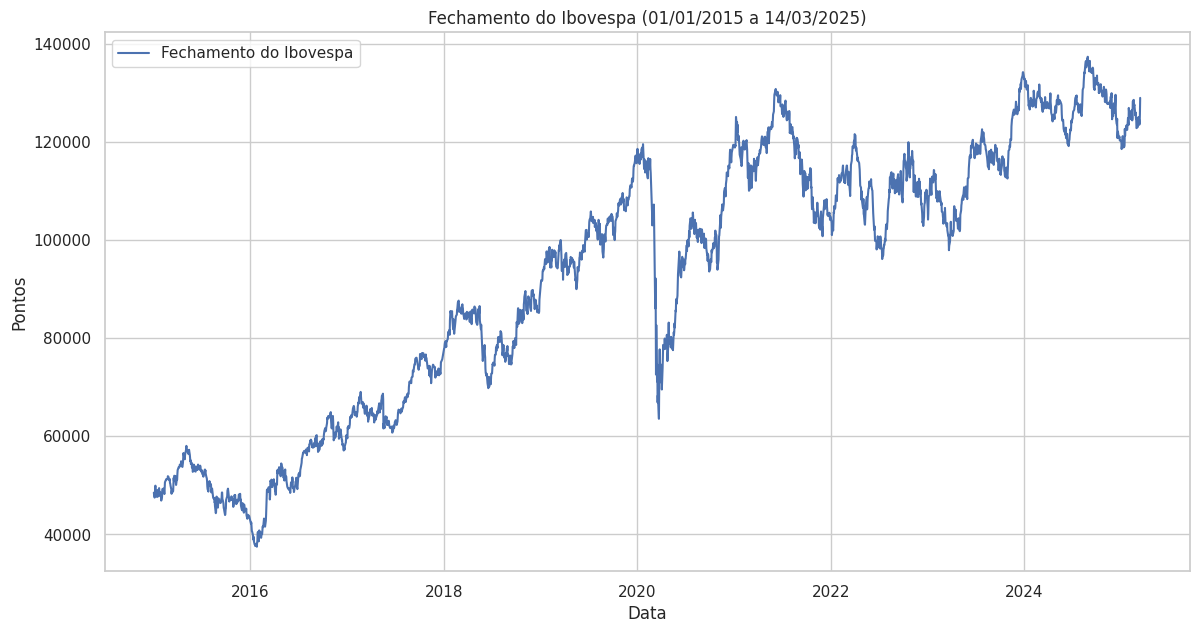

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(bovespa_fechamentos.index, bovespa_fechamentos.values, label="Fechamento do Ibovespa")
plt.title("Fechamento do Ibovespa (01/01/2015 a 14/03/2025)")
plt.xlabel("Data")
plt.ylabel("Pontos")
plt.legend()
plt.show()

In [ ]:
#Percebemos que os nossos dados tem uma tendência de crescimento ao longo do tempo e que foram afetados no periodo do covid 19, principalmente no primeiro ano da pandemia(2020).

In [ ]:
#Para começar a entender o comportamento da série, vamos fazer a decomposição, como os dados são diários, analisaremos o comportamento anual (period=365).
decomposicao = seasonal_decompose(bovespa_fechamentos,period=365)

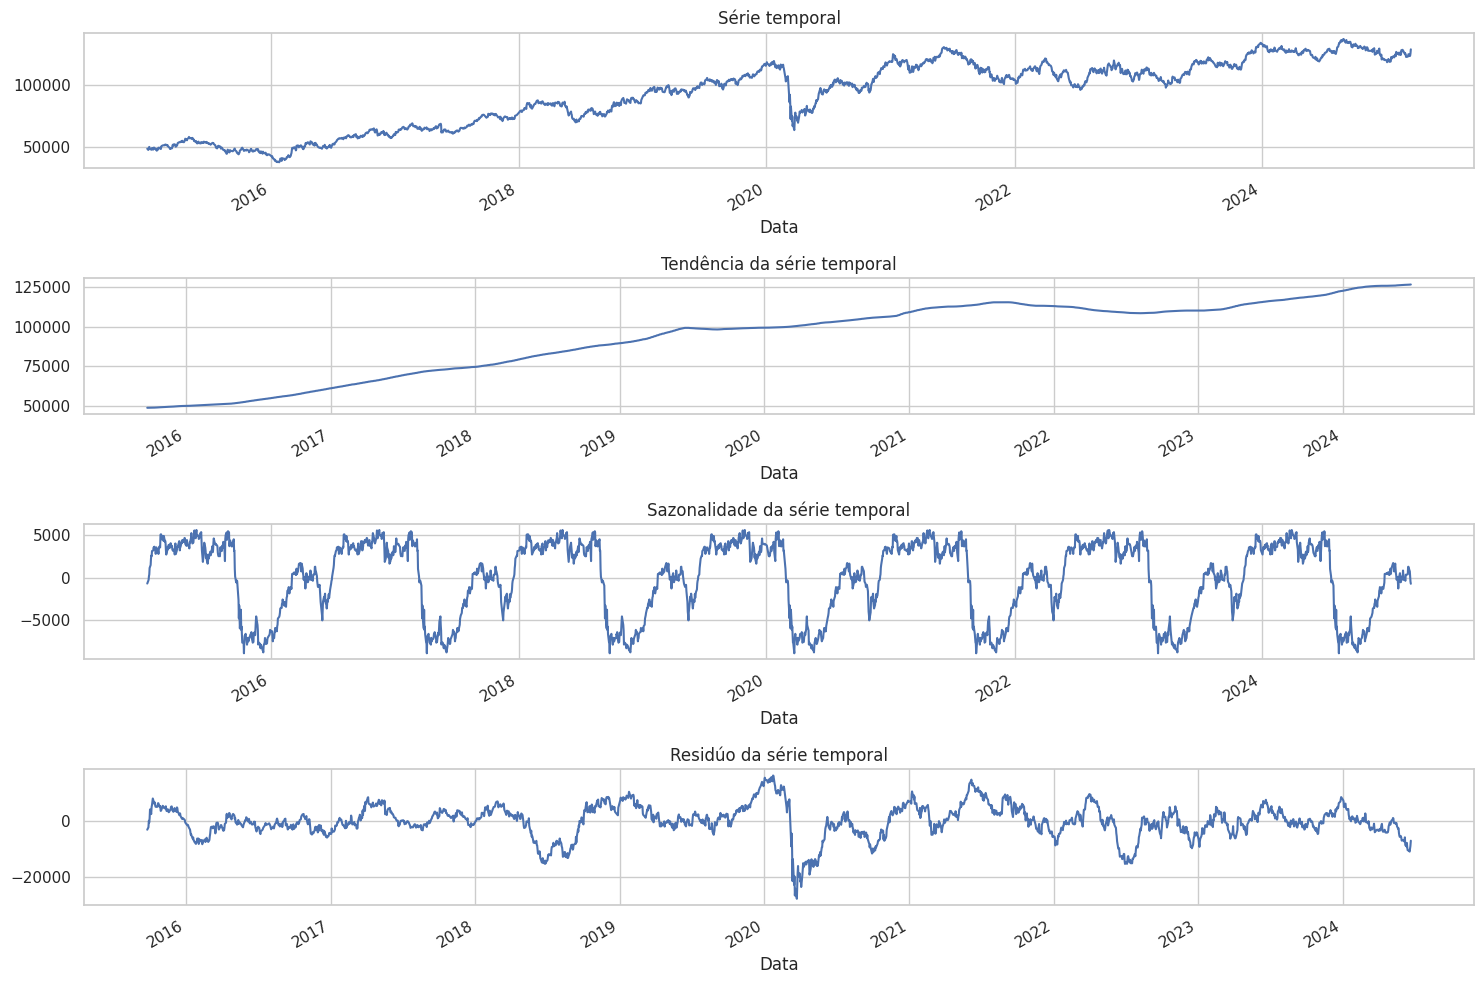

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))

decomposicao.observed.plot(ax=ax1) # plotando a série com dados brutos
ax1.set_title('Série temporal')
decomposicao.trend.plot(ax=ax2) # plotando a tendência da série
ax2.set_title('Tendência da série temporal')
decomposicao.seasonal.plot(ax=ax3) # plotando a sazonalidade da série
ax3.set_title('Sazonalidade da série temporal')
decomposicao.resid.plot(ax=ax4) # plotando o resúduo da série
ax4.set_title('Residúo da série temporal')


plt.tight_layout()

In [ ]:
# Apesar da nossa série temporal ter uma tendência de crescimento, o que já indica que ela não é uma série estacionária, vamos fazer o teste do ADF (Dickey-Fuller Aumentado)

# Vamos salvar os valores da série em um array (x)
x=bovespa_fechamentos.values

resultado_adf=adfuller(x)
print('Teste ADF')
print(f"Teste Estatistico: {resultado_adf[0]}")
print(f"P-Value: {resultado_adf[1]}")
print("Valores criticos: ")

for key, value in resultado_adf[4].items():
  print(f"\t{key}:{value}")

# Como o teste resultou em um valor maior do que os valores críticos, temos a confirmação de que ela não é estacionária

Teste ADF
Teste Estatistico: -0.9917020504049114
P-Value: 0.7562787429824251
Valores criticos: 
	1%:-3.4329476085791493
	5%:-2.8626876136761292
	10%:-2.5673809185248175


<Axes: xlabel='Data'>

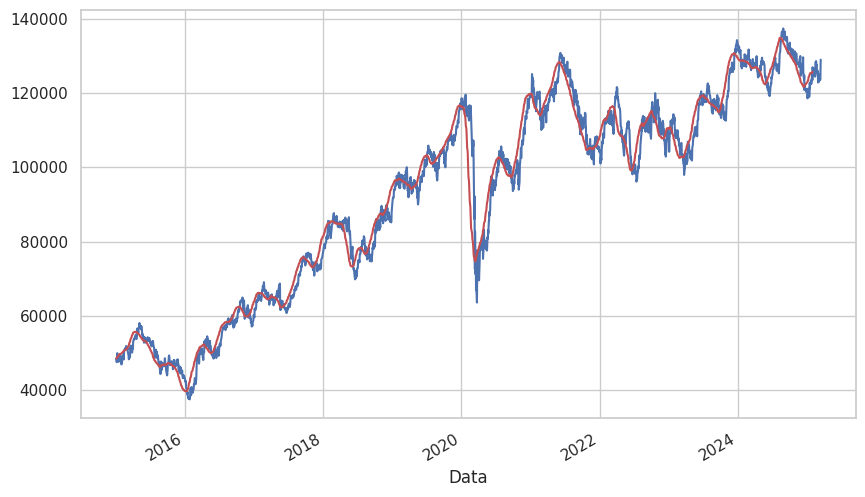

In [ ]:
# Verificando o comportamento da média móvel durante o passar do tempo
ma = bovespa_fechamentos.rolling(30).mean()

f, ax = plt.subplots(figsize=(10,6))
bovespa_fechamentos.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')


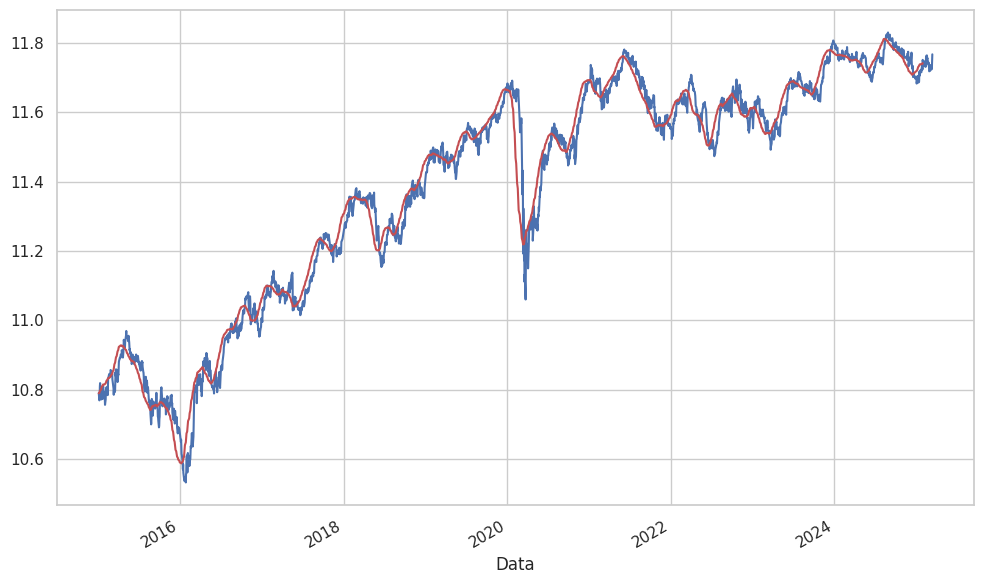

In [ ]:
# Como podemos observar, temos um comportamento muito fora do padrão na epoca da pandemia.

# Para verificar se a série pode ser tranformada em estacionária, e assim suavizar o comportamento durante a pandemia, vamos aplicar a transformação logaritmica.
bovespa_fechamentos_log = np.log(bovespa_fechamentos)
ma_log = bovespa_fechamentos_log.rolling(30).mean()

f, ax = plt.subplots(figsize=(10,6))
bovespa_fechamentos_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

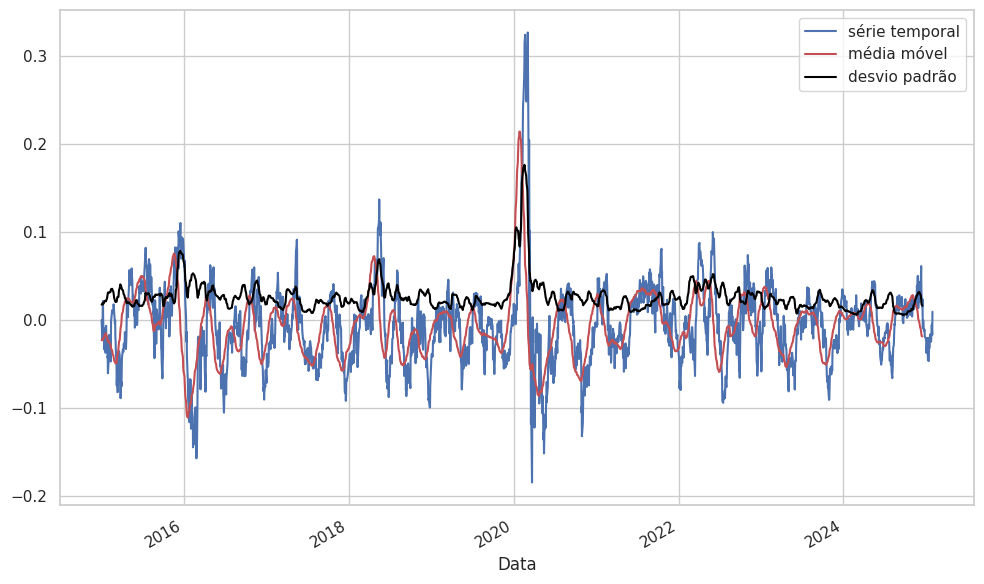

In [ ]:
# Seguindo com a suavização vamos retirar o efeito da média móvel da série
bovespa_fechamentos_s = (bovespa_fechamentos_log - ma_log).dropna()

ma_s = bovespa_fechamentos_s.rolling(30).mean()

std = bovespa_fechamentos_s.rolling(30).std()

f, ax = plt.subplots(figsize=(10,6))
bovespa_fechamentos_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='black')
plt.legend(['série temporal','média móvel','desvio padrão'])
plt.tight_layout()


<Axes: xlabel='Data'>

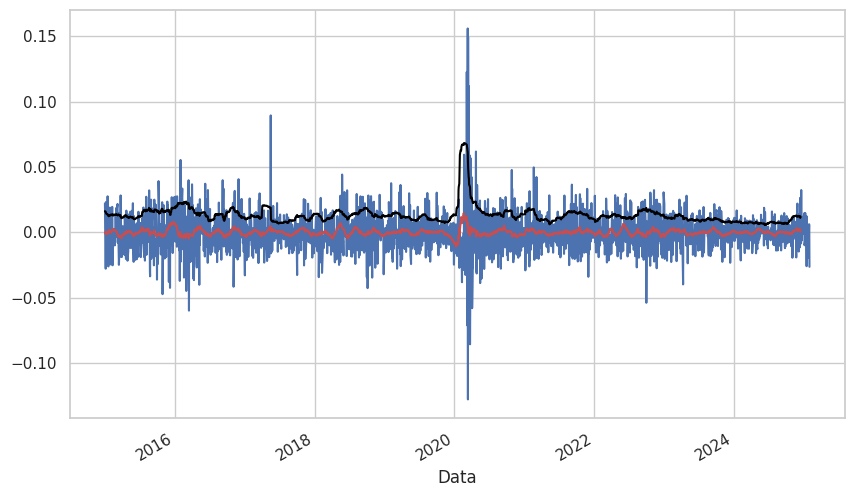

In [ ]:
# Para finalizar, vamos aplicar a diferenciação
bovespa_fechamentos_diff = bovespa_fechamentos_s.diff(1)
ma_diff = bovespa_fechamentos_diff.rolling(30).mean()

std_diff = bovespa_fechamentos_diff.rolling(30).std()

f, ax = plt.subplots(figsize=(10,6))
bovespa_fechamentos_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='black')

# Mesmo aplicando a diferenciação na série, não conseguimos equalizar os efeitos no desvio padrão na epoca da pandemia.


In [ ]:
# Vamos aplicar novamente o teste de ADF, para verificar se agora a série é estacionária
x=bovespa_fechamentos_diff.dropna()

resultado_adf=adfuller(x)
print('Teste ADF')
print(f"Teste Estatistico: {resultado_adf[0]}")
print(f"P-Value: {resultado_adf[1]}")
print("Valores criticos: ")

for key, value in resultado_adf[4].items():
  print(f"\t{key}:{value}")

# Como o resultado do teste estatistico é menor que os valores críticos, a série passou a ser estacionária.

Teste ADF
Teste Estatistico: -13.024203005994417
P-Value: 2.418586912995283e-24
Valores criticos: 
	1%:-3.4329959571307342
	5%:-2.8627089644059445
	10%:-2.5673922859370437


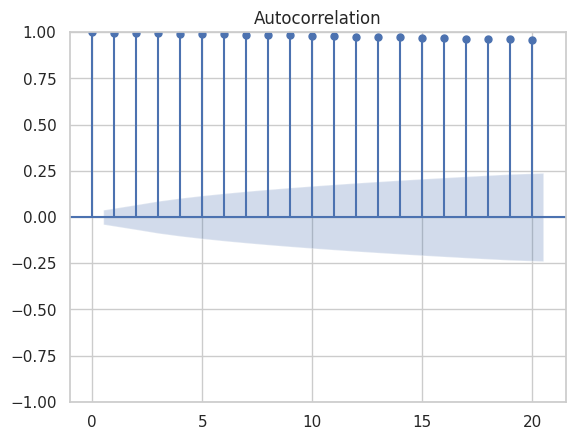

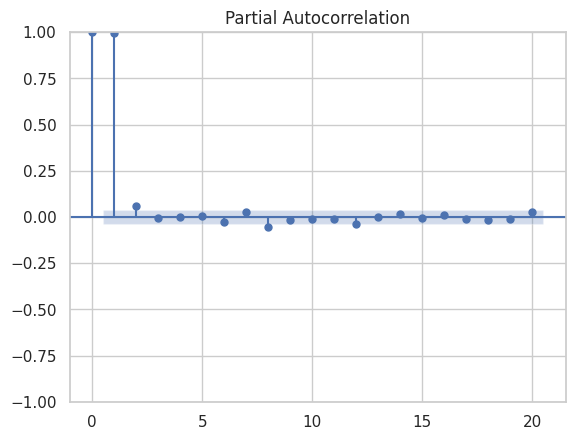

In [ ]:
# Antes de começarmos a desenvolver os modelos, vamos verificar a correlação da série temporal
plot_acf(bovespa_fechamentos.dropna(), lags=20)
plot_pacf(bovespa_fechamentos.dropna(), lags=20)
plt.show()



# Desenvolvimento de modelos #

## Separação das bases de treino e teste ##


###**Preparação dos Dados para Modelagem Preditiva**

* Padronizando o Formato dos Dados

 * Renomeamos as colunas para "ds" (data) e "y" (valor de fechamento), alinhando com os requisitos dos modelos preditivos.
 * Resetamos o índice para transformar as datas em uma coluna, facilitando o uso em algoritmos como Prophet e StatsForecast.
 * Adicionamos a coluna "unique_id" para identificar a série.

* Filtrando o Período de Análise

 * Como a pandemia impactou significativamente os dados em 2020, optamos por considerar apenas os dados a partir de 01/01/2021, garantindo maior estabilidade nas previsões.

* Criando Conjuntos de Treino e Validação

 * Treino: contém os dados históricos até 29/01/2025.
 * Validação: abrange os últimos 30 dias da série (de 30/01/2025 a 14/03/2025).
 * Como a bolsa não opera em feriados, ajustamos o número de dias úteis de validação para 22 dias.

* Ordenação dos Dados

 * Reorganizamos os conjuntos de treino e validação para garantir que as datas mais recentes apareçam no final, mantendo a coerência cronológica.

* Criando a Métrica de Avaliação

 * Implementamos a função WMAPE (Weighted Mean Absolute Percentage Error), que mede a precisão dos modelos, considerando a importância de cada valor na série.

####**Conclusão:**
Agora temos um conjunto de dados estruturado e otimizado, pronto para alimentar modelos de previsão com maior confiabilidade. O ajuste do período analisado e a definição de métricas permitirão avaliar o desempenho dos modelos de forma precisa.

In [ ]:
# Renomeamos o nome das colunas para ds (data) e y (fechamento), para padronizar e facilitar a aplicação nos modelos.
# Resetamos o índice do dataframe para transformar o índice na coluna 'ds'
bovespa_fechamentos_modelo=bovespa_fechamentos
bovespa_fechamentos_modelo.rename(columns={'Fechamento':'y'}, inplace=True)
bovespa_fechamentos_modelo.rename_axis(index={'Data':'ds'},inplace=True)
bovespa_fechamentos_modelo['unique_id']='Ibovespa'
bovespa_fechamentos_modelo.reset_index(inplace=True)

In [ ]:
# Devido a nossa base de dados ter uma queda significativa no primeiro ano da pandemia (2020),
# optamos por usar os dados a partir de 01/01/2021, sendo assim nossa base contemplará aproximadamente 4 anos de histórico
bovespa_fechamentos_modelo=bovespa_fechamentos_modelo[bovespa_fechamentos_modelo['ds']>='2021-01-01']

In [ ]:
# Vamos criar o dataframe de validação e treino
# A validação iremos usar os últimos 30 dias do dataframe original, como nossa base tem dados até 14/03/2025 a base de validação iniciará dia 30/01/2025
# O treino usaremos os demais períodos
validacao = bovespa_fechamentos_modelo[(bovespa_fechamentos_modelo['ds']>='2025-01-30')]
treino = bovespa_fechamentos_modelo[(bovespa_fechamentos_modelo['ds']<'2025-01-30')] #& (bovespa_fechamentos['ds']>'2024-01-01')]
h=validacao['ds'].nunique()

In [ ]:
# Tamanho da base de validação (possui dias uteis)
h

# Para os modelos usaremos h=32 pois teremos que considerar 2 dias de feriados (carnaval) que não possuem fechamento do bovespa

30

In [ ]:
# Classificando o dataframe para que as datas recentes fique nas ultimas linhas
bovespa_fechamentos_modelo.sort_values('ds', inplace=True)

In [ ]:
# Classificando o dataframe para que as datas recentes fique nas ultimas linhas
validacao.sort_values('ds',inplace=True)

In [ ]:
# Criando a função para medir a acuracia do modelo com wmape
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum()/np.abs(y_true).sum()

## Naive ##

###**Testando o Primeiro Modelo Preditivo: Naive Forecast**

* Definição do Modelo

 * Utilizamos o Naïve Forecast, um modelo simples que assume que o último valor observado será a previsão para os próximos períodos.
 * Como nossa base contém apenas dias úteis, configuramos a previsão para seguir a mesma lógica (freq='B').
 * Utilizamos todos os núcleos do processador (n_jobs=-1) para otimizar o tempo de processamento.

* Treinamento e Previsão

 * O modelo foi treinado com os dados históricos de treino.
 * Geramos previsões para os próximos 32 dias úteis, considerando feriados e fins de semana.

* Avaliação da Performance

 * Comparamos as previsões com os valores reais do período de validação.
 * Calculamos as principais métricas de erro:
   * WMAPE (Weighted MAPE): Mede o erro percentual ponderado.
   * MAPE (Mean Absolute Percentage Error): Erro percentual médio.
   * MAE (Mean Absolute Error): Média dos erros absolutos.
   * MSE (Mean Squared Error): Média dos erros quadráticos.

* Visualização da Previsão

 * Geramos um gráfico para comparar a tendência prevista pelo modelo com os dados reais, analisando sua precisão ao longo do tempo.

####**Conclusão:**
O modelo Naive funciona como uma linha de base para comparação com modelos mais avançados. Embora seja útil para cenários sem tendência ou sazonalidade significativa, ele não captura padrões complexos do mercado. Naive se baseia apenas no valor do último periodo, sendo assim, seu o resultado é constante e pouco útil. Isso indica a necessidade de modelos mais sofisticados para melhorar a precisão da previsão.

WMAPE: 1.86%
MAPE: 1.84%
MAE: 2336.7666015625
MSE: 7819474.0


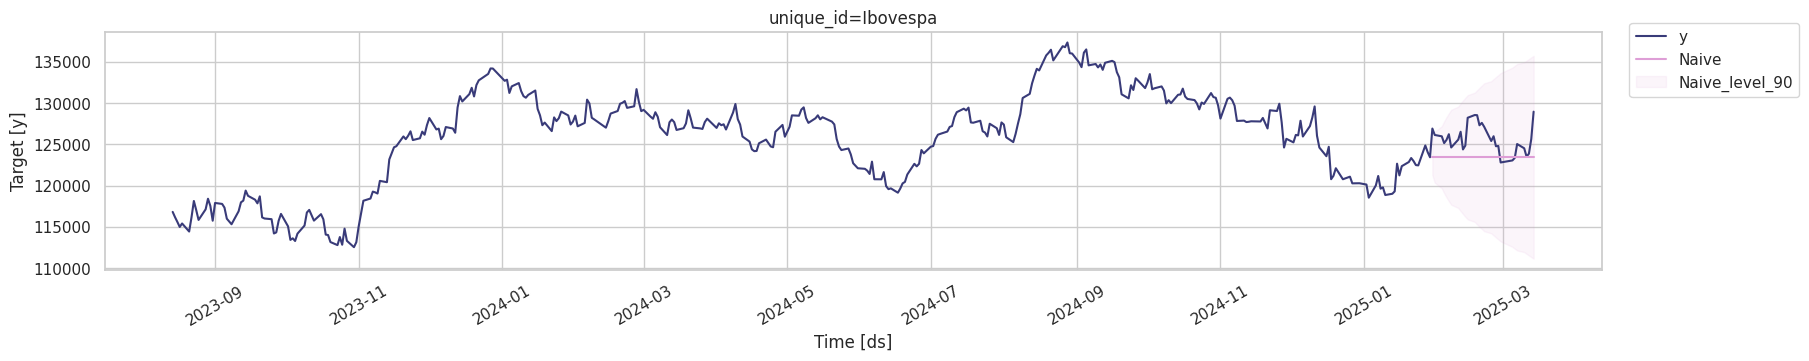

In [ ]:
# Como nosso dataframe original só possui dias uteis, vamos usar a frequencia para dias uteis em nossa previsão (freq='B')
# Usaremos também todos os núcleos de processamento (n_jobs=-1)
model_naive = StatsForecast(models=[Naive()], freq='B', n_jobs=-1)
model_naive.fit(treino)


forecast_naive= model_naive.predict(h=h+2, level=[90])
forecast_naive = forecast_naive.merge(validacao, on=['ds','unique_id'], how='inner')


wmape_naive = wmape(forecast_naive['y'].values, forecast_naive['Naive'].values)
mae_naive = mean_absolute_error(forecast_naive['y'].values, forecast_naive['Naive'].values)
mape_naive = mean_absolute_percentage_error(forecast_naive['y'].values, forecast_naive['Naive'].values)
mse_naive = mean_squared_error(forecast_naive['y'].values, forecast_naive['Naive'].values)

print(f"WMAPE: {wmape_naive:.2%}")
print(f"MAPE: {mape_naive:.2%}")
print(f"MAE: {mae_naive}")
print(f"MSE: {mse_naive}")
model_naive.plot(treino, forecast_naive, level=[90], unique_ids=['Ibovespa'],engine ='matplotlib', max_insample_length=365)

Como o Naive é um modelo baseline que se baseia apenas no valor do último periodo, o resultado é constante e pouco útil como previsão

## Seasonal Naive ##

###**Aprimorando a Previsão: Modelo Seasonal Naive**

* Definição do Modelo

 * Evoluímos do modelo Naive para o Seasonal Naive, que considera padrões sazonais na série temporal.
 * Configuramos a sazonalidade semanal (season_length=7), assumindo que os padrões do Ibovespa podem se repetir a cada semana.
 * Mantivemos a frequência de dias úteis (freq='B') e utilizamos todos os núcleos do processador para melhor desempenho (n_jobs=-1).

* Treinamento e Previsão

 * O modelo foi treinado com os dados históricos e gerou previsões para os próximos 32 dias úteis.

* Avaliação da Performance

 * Comparamos as previsões com os valores reais do período de validação.
 * Calculamos as principais métricas de erro:
   * WMAPE (Weighted MAPE): Erro percentual ponderado.
   * MAPE (Mean Absolute Percentage Error): Erro percentual médio.
   * MAE (Mean Absolute Error): Média dos erros absolutos.
   * MSE (Mean Squared Error): Média dos erros quadráticos.

* Visualização da Previsão

 * Criamos um gráfico comparando as previsões do modelo com os valores reais, analisando a aderência do modelo aos movimentos do mercado.

###**Conclusão:**

O Seasonal Naive já apresenta uma evolução em relação ao modelo Naive puro, pois considera padrões sazonais semanais. No entanto, ainda é um modelo simples e pode não capturar mudanças estruturais no mercado. O próximo passo será testar modelos mais avançados, como AutoARIMA e Prophet, para obter previsões mais precisas e robustas.

WMAPE: 1.98%
MAPE: 1.97%
MAE: 2494.0
MSE: 8752680.0


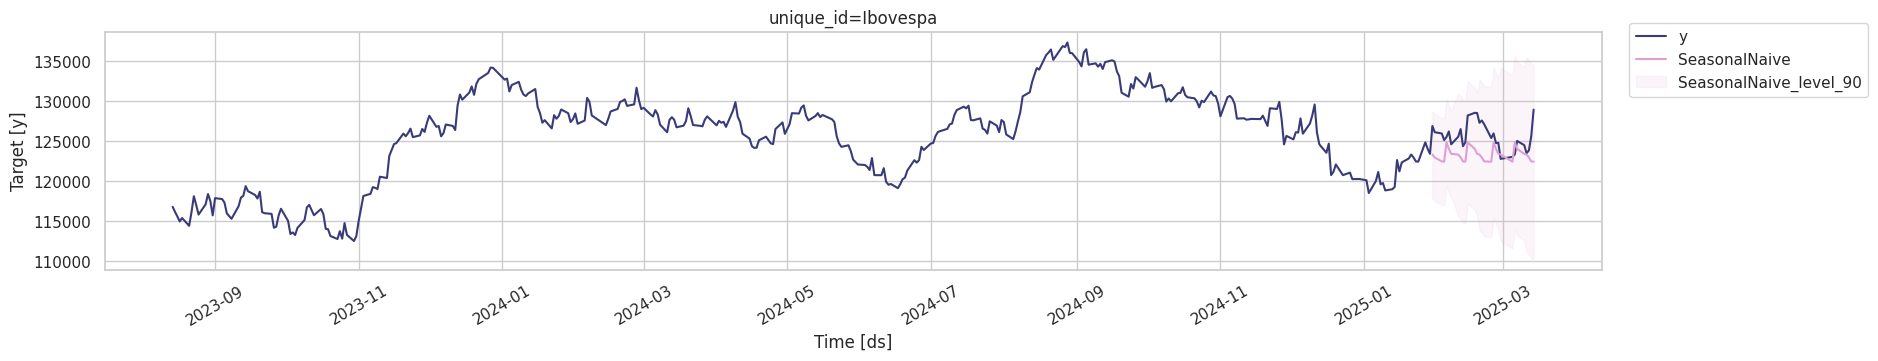

In [ ]:
# Como nosso dataframe original só possui dias uteis, vamos usar a frequencia para dias uteis em nossa previsão (freq='B')
# Usaremos também todos os núcleos de processamento (n_jobs=-1)
# Consideramos sazonalidade semanal (season_length=7)
model_seasonalnaive = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='B', n_jobs=-1)
model_seasonalnaive.fit(treino)

forecast_seasonalnaive= model_seasonalnaive.predict(h=h+2, level=[90])
forecast_seasonalnaive = forecast_seasonalnaive.merge(validacao, on=['ds','unique_id'], how='inner')



wmape_seasonalnaive = wmape(forecast_seasonalnaive['y'].values, forecast_seasonalnaive['SeasonalNaive'].values)
mae_seasonalnaive = mean_absolute_error(forecast_seasonalnaive['y'].values, forecast_seasonalnaive['SeasonalNaive'].values)
mape_seasonalnaive = mean_absolute_percentage_error(forecast_seasonalnaive['y'].values, forecast_seasonalnaive['SeasonalNaive'].values)
mse_seasonalnaive = mean_squared_error(forecast_seasonalnaive['y'].values, forecast_seasonalnaive['SeasonalNaive'].values)

print(f"WMAPE: {wmape_seasonalnaive:.2%}")
print(f"MAPE: {mape_seasonalnaive:.2%}")
print(f"MAE: {mae_seasonalnaive}")
print(f"MSE: {mse_seasonalnaive}")


model_seasonalnaive.plot(treino, forecast_seasonalnaive, level=[90], unique_ids=['Ibovespa'],engine ='matplotlib', max_insample_length=365)

O modelo Seasonal Naive já inclui em sua previsão a sazonalidade dos dados, porém percebemos que ainda não foi muito eficiente em se enquadrar ao comportamento dos nossos dados.

## Auto Arima ##

####**Aprimorando a Previsão: Implementação do Modelo AutoARIMA**

* Definição do Modelo

 * Após testar modelos mais simples, agora utilizamos o AutoARIMA, um modelo estatístico que identifica automaticamente os melhores parâmetros para ajustar a série temporal.
 * Consideramos a sazonalidade semanal (season_length=7), reconhecendo padrões recorrentes no comportamento do mercado.
 * Mantivemos a frequência de dias úteis (freq='B') e a otimização do processamento (n_jobs=-1).

* Treinamento e Previsão

 * O modelo foi treinado com dados históricos desde 2021, excluindo os impactos extremos da pandemia.
 * Geramos previsões para os próximos 32 dias úteis.

* Avaliação da Performance
 * Comparamos as previsões do AutoARIMA com os valores reais do período de validação.
 * Calculamos as principais métricas de erro:
   * WMAPE: Erro percentual ponderado.
   * MAPE: Erro percentual médio.
   * MAE: Média dos erros absolutos.
   * MSE: Média dos erros quadráticos.

* Visualização da Previsão

 * Criamos um gráfico comparando as previsões do AutoARIMA com os valores reais, analisando sua precisão na captura das tendências do Ibovespa.

###**Conclusão:**

O AutoARIMA já representa um avanço significativo em relação aos modelos Naive e Seasonal Naive, pois leva em consideração não apenas padrões sazonais, mas também correlações estatísticas na série temporal. No entanto,  ele pode ter dificuldades em capturar eventos inesperados do mercado sem o devido cuidado.

O próximo passo será testar modelos que ainda são estatísticos, porém ainda mais otimizados através de GridSearch, que podem fornecer previsões ainda mais precisas

WMAPE: 1.86%
MAPE: 1.84%
MAE: 2336.7666015625
MSE: 7819474.0


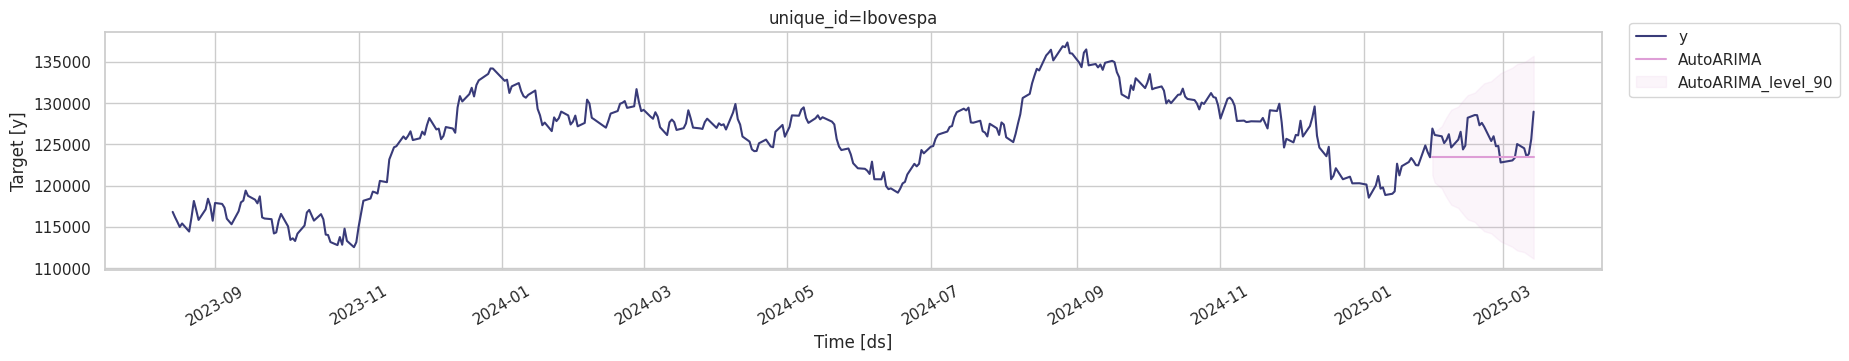

In [ ]:
# Como nosso dataframe original só possui dias uteis, vamos usar a frequencia para dias uteis em nossa previsão (freq='B')
# Usaremos também todos os núcleos de processamento (n_jobs=-1)
# Consideramos sazonalidade semanal (season_length=7)

model_arima = StatsForecast(models=[AutoARIMA(season_length=7)], freq='B', n_jobs=-1)
model_arima.fit(treino)

forecast_arima= model_arima.predict(h=h+2, level=[90])
forecast_arima = forecast_arima.merge(validacao, on=['ds','unique_id'], how='inner')


wmape_arima = wmape(forecast_arima['y'].values, forecast_arima['AutoARIMA'].values)
mae_arima = mean_absolute_error(forecast_arima['y'].values, forecast_arima['AutoARIMA'].values)
mape_arima = mean_absolute_percentage_error(forecast_arima['y'].values, forecast_arima['AutoARIMA'].values)
mse_arima = mean_squared_error(forecast_arima['y'].values, forecast_arima['AutoARIMA'].values)

print(f"WMAPE: {wmape_arima:.2%}")
print(f"MAPE: {mape_arima:.2%}")
print(f"MAE: {mae_arima}")
print(f"MSE: {mse_arima}")


model_arima.plot(treino, forecast_arima, level=[90], unique_ids=['Ibovespa'],engine ='matplotlib', max_insample_length=365)

o modelo ARIMA, que apesar de ser mais sofisticado que os modelos NAIVE, não conseguiu prever a sazonlidade de forma satisfatória.

## Sarima ##

###**Aprimorando a Previsão: Implementação do Modelo SARIMA**

* Definição do Modelo
 * O modelo SARIMA (Seasonal ARIMA) é uma extensão do ARIMA que inclui componentes sazonais, permitindo capturar padrões que se repetem ao longo do tempo.
 * Inicialmente, utilizamos parâmetros básicos:
   * (p, d, q) = (1, 1, 1): Captura tendências e padrões curtos.
   * (P, D, Q) = (1, 1, 1) com sazonalidade de 7 dias: Considera ciclos semanais no mercado.
 * Mantivemos a frequência de dias úteis (freq='B') para respeitar os dias de operação da bolsa.

* Treinamento e Previsão

 * O modelo foi treinado com os dados históricos desde 2021 e projetou valores para os próximos 32 dias úteis.

* Otimização com Grid Search
 * Para encontrar a melhor configuração de parâmetros, utilizamos uma busca exaustiva (Grid Search) testando diferentes combinações de:
   * (p, d, q) e (P, D, Q) no intervalo de 0 a 2.
   * Sazonalidades de 7, 30 e 365 dias (semanal, mensal e anual).
 * A métrica utilizada para avaliar a performance foi o MAPE (erro percentual médio absoluto).
 * Após testar diversas combinações, selecionamos os melhores parâmetros e ajustamos um novo modelo SARIMA otimizado.

* Avaliação da Performance
 * Comparação das previsões com os valores reais do período de validação.
 * Cálculo das métricas de erro:
   * WMAPE, MAPE, MAE e MSE.

* Visualização da Previsão

 * Criamos um gráfico comparando as previsões do SARIMA otimizado com os valores reais.

###**Conclusão:**
O SARIMA trouxe melhorias significativas em relação ao AutoARIMA, pois agora consideramos diferentes sazonalidades e otimizamos os parâmetros. Isso permitiu capturar melhor padrões cíclicos do mercado.

No entanto, por ser um modelo estatístico, ele pode enfrentar desafios para captar impactos de eventos inesperados e mudanças estruturais no mercado.

Próximo Passo: Testar o modelo Prophet, que é mais flexível e permite incorporar variáveis externas e tendências não lineares!

WMAPE: 2.32%
MAPE: 2.31%
MAE: 2920.478759765625
MSE: 11105010.0


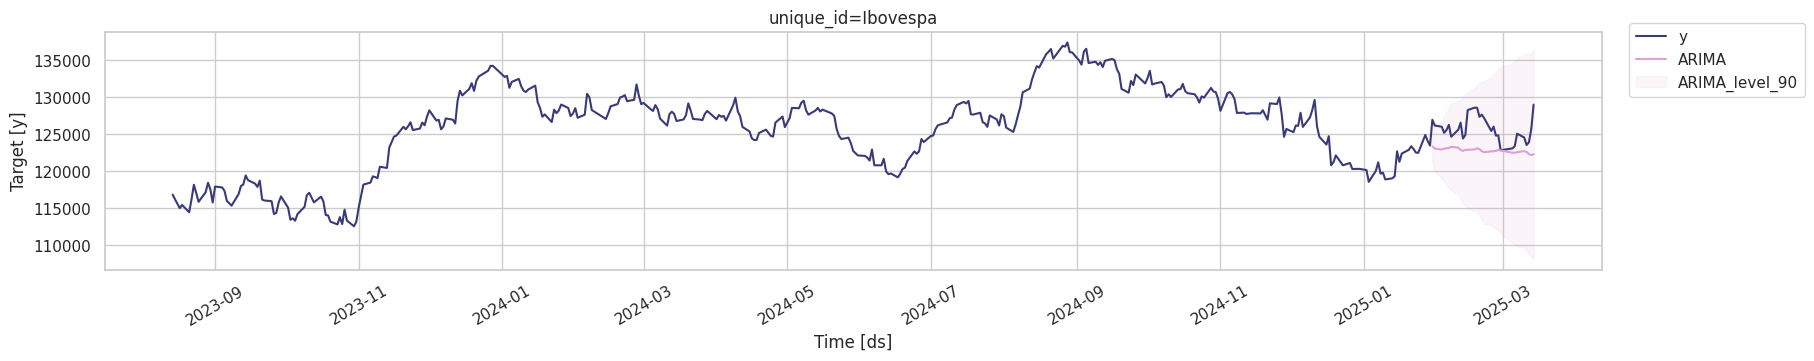

In [ ]:
#treino = treino.drop(columns=['covid_impact'])



model_sarima = StatsForecast(
    models=[ARIMA(
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1),
        season_length=7              # Sazonalidade semanal
    )],
    freq='B',
    n_jobs=-1
)

model_sarima.fit(treino)
forecast_sarima = model_sarima.predict(h=h+2, level=[90])
forecast_sarima = forecast_sarima.merge(validacao, on=['ds', 'unique_id'], how='inner')

wmape_sarima = wmape(forecast_sarima['y'], forecast_sarima['ARIMA'])
mae_sarima = mean_absolute_error(forecast_sarima['y'], forecast_sarima['ARIMA'])
mape_sarima = mean_absolute_percentage_error(forecast_sarima['y'], forecast_sarima['ARIMA'])
mse_sarima = mean_squared_error(forecast_sarima['y'], forecast_sarima['ARIMA'])

print(f"WMAPE: {wmape_sarima:.2%}")
print(f"MAPE: {mape_sarima:.2%}")
print(f"MAE: {mae_sarima}")
print(f"MSE: {mse_sarima}")


model_sarima.plot(treino, forecast_sarima, level=[90], unique_ids=['Ibovespa'], engine='matplotlib', max_insample_length=365)

In [ ]:
# Otimização do modelo SARIMA utilizando GridSearch


# Definindo os intervalos de valores para Grid Search
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
season_length = [7, 30, 365]  # Testando sazonalidades semanal, mensal e anual

# Gerando todas as combinações possíveis
param_grid = list(product(p, d, q, P, D, Q, season_length))

melhor_mape_sarima = float('inf')
melhores_parametros_sarima = None

for params in param_grid:
    try:
        model_sarima_grid = StatsForecast(
            models=[ARIMA(
                order=(params[0], params[1], params[2]),
                seasonal_order=(params[3], params[4], params[5]),
                season_length=params[6]
            )],
            freq='D',
            n_jobs=-1
        )

        model_sarima_grid.fit(treino)
        forecast_sarima = model_sarima_grid.predict(h=h, level=[90])
        forecast_sarima = forecast_sarima.merge(validacao, on=['ds', 'unique_id'], how='inner')

        mape_sarima = mean_absolute_percentage_error(forecast_sarima['y'], forecast_sarima['ARIMA'])

        if mape_sarima < melhor_mape_sarima:
            melhor_mape_sarima = mape_sarima
            melhores_parametros_sarima = params

    except:
        continue  # Ignorar combinações que resultam em erro

print(f"Melhores parâmetros SARIMA: {melhores_parametros_sarima}")
print(f"Melhor MAPE: {melhor_mape_sarima:.2%}")

# Treinando o melhor modelo SARIMA com os melhores parâmetros encontrados
model_sarima = StatsForecast(
    models=[ARIMA(
        order=(melhores_parametros_sarima[0], melhores_parametros_sarima[1], melhores_parametros_sarima[2]),
        seasonal_order=(melhores_parametros_sarima[3], melhores_parametros_sarima[4], melhores_parametros_sarima[5]),
        season_length=melhores_parametros_sarima[6]
    )],
    freq='D',
    n_jobs=-1
)

model_sarima.fit(treino)

## Prophet ##

###**Previsão Final: Prophet**

* Tratamento de Feriados
 * Criamos uma lista com os feriados nacionais que impactam o mercado financeiro, pois nesses dias a bolsa não opera. Isso ajuda o modelo a entender períodos em que não há movimentação no índice.

* Impacto da COVID-19
 * Adicionamos um fator que identifica o período crítico da pandemia no Brasil (março de 2020 a junho de 2021). Isso permite que o modelo aprenda como eventos extraordinários afetam os preços.

* Configuração do Modelo
 * Ajustamos o Prophet para considerar sazonalidade anual (comportamento recorrente do mercado a cada ano) e incluímos os feriados como um fator adicional.
 * Definimos a sazonalidade como multiplicativa, pois oscilações no Ibovespa geralmente são proporcionais ao próprio valor do índice.

* Treinamento e Previsão
 * Geramos previsões para os próximos períodos e avaliamos a precisão com métricas como WMAPE, MAPE, MAE e MSE.

* Otimização
 * Para melhorar os resultados, testamos diferentes combinações de parâmetros para encontrar os que melhor descrevem o comportamento do mercado.
 * Com essa otimização, conseguimos reduzir o erro percentual da previsão, tornando o modelo mais confiável.

####**Conclusão:**
O Prophet demonstrou boa capacidade de prever o comportamento do Ibovespa ao capturar padrões sazonais e eventos excepcionais. Esse tipo de modelo é útil para analistas e investidores que buscam projeções estratégicas baseadas em dados históricos.

In [ ]:
# Criando uma classe para armazenar os feriados, pois serão excluídos da nossa previsão

class B3Holidays(AbstractHolidayCalendar):
   rules = [
        Holiday("Confraternização Universal", month=1, day=1),
        Holiday("Carnaval1", month=3, day=3),  # Ajuste conforme o ano
        Holiday("Carnaval2", month=3, day=4),  # Ajuste conforme o ano
        Holiday("Sexta-feira Santa", month=4, day=7),
        Holiday("Tiradentes", month=4, day=21),
        Holiday("Dia do Trabalho", month=5, day=1),
        Holiday("Independência", month=9, day=7),
        Holiday("Nossa Senhora Aparecida", month=10, day=12),
        Holiday("Finados", month=11, day=2),
        Holiday("Proclamação da República", month=11, day=15),
        Holiday("Natal", month=12, day=25),
    ]

b3_holidays = B3Holidays().holidays(start='2015-01-01', end='2025-12-31')

In [ ]:
#Criando um DataFrame com as datas e um indicador para o período da COVID
covid_dates = pd.date_range(start='2020-03-01', end='2021-06-30', freq='B')  # Período crítico da pandemia
covid_df = pd.DataFrame({'ds': covid_dates, 'covid_impact': 1})

In [ ]:
# Vamos estanciar o modelo na variavel model_prophet

model_prophet = Prophet(weekly_seasonality=False, daily_seasonality=False,yearly_seasonality=True,holidays=pd.DataFrame({'ds': b3_holidays, 'holiday': 'feriado'}),seasonality_mode='multiplicative')

#tratando sazonalidade
model_prophet.add_seasonality(name='daily', period=1, fourier_order=10)

#tratando COVID
model_prophet.add_regressor('covid_impact')
model_prophet.add_country_holidays(country_name='BR')

#Juntando os dados de treino com o impacto da COVID
treino_prophet = treino.merge(covid_df, on='ds', how='left').fillna(0)

# Fazendo o treinamento do modelo
model_prophet.fit(treino_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/m1h37v7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/zks071aj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27843', 'data', 'file=/tmp/tmpeg161mjl/m1h37v7e.json', 'init=/tmp/tmpeg161mjl/zks071aj.json', 'output', 'file=/tmp/tmpeg161mjl/prophet_modelbdfjdiff/prophet_model-20250323153046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Gerando as datas que serão usadas na previsão do modelo
future = model_prophet.make_future_dataframe(periods=h+2,freq='B')

# Adicionando a coluna 'covid_impact' ao conjunto de previsão
future = future.merge(covid_df, on='ds', how='left').fillna(0)

# Gerando as previsões
forecast_prophet = model_prophet.predict(future)



WMAPE: 2.60%
MAPE: 2.58%
MAE: 3266.104666666668
MSE: 12869137.373405145


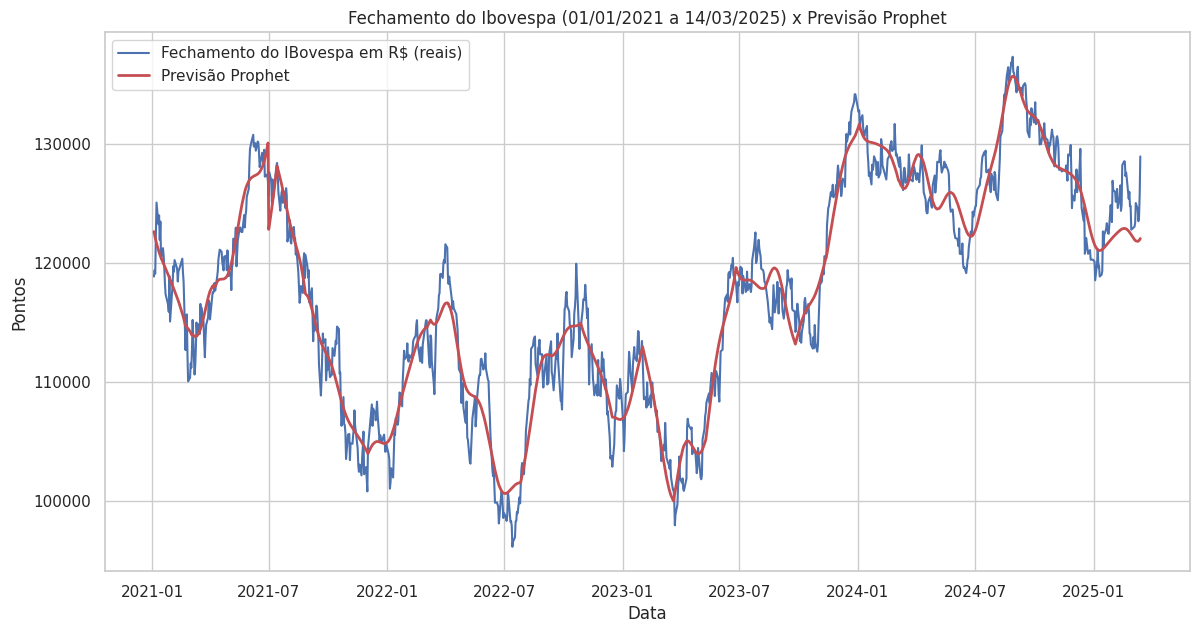

In [ ]:
# Plotando o resultado do modelo prophet x dados originais
# Calculando o wmape apenas dos ultimos 30 dias como foi feito nos modelos anteriores

forecast_prophet = forecast_prophet.merge(bovespa_fechamentos_modelo, on=['ds'], how='inner')

wmape_prophet = wmape(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))
mae_prophet = mean_absolute_error(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))
mape_prophet = mean_absolute_percentage_error(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))
mse_prophet = mean_squared_error(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))




print(f"WMAPE: {wmape_prophet:.2%}")
print(f"MAPE: {mape_prophet:.2%}")
print(f"MAE: {mae_prophet}")
print(f"MSE: {mse_prophet}")



plt.figure(figsize=(14, 7))
plt.plot(bovespa_fechamentos_modelo['ds'], bovespa_fechamentos_modelo['y'], label="Fechamento do IBovespa em R$ (reais)")
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label="Previsão Prophet", color='r', linewidth=2)
plt.title("Fechamento do Ibovespa (01/01/2021 a 14/03/2025) x Previsão Prophet")
plt.xlabel("Data")
plt.ylabel("Pontos")
plt.legend()
plt.show()

In [ ]:
# Vamos otimizar os hiperparametros do Prophet, para iniciar vamos criar um dicionário com os hiperparametros e valores a serem testados.
parametros_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0],  # Flexibilidade da tendência
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],  # Efeito da sazonalidade
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],  # flexibilidade dos feriados
    'seasonality_mode': ['additive', 'multiplicative'],  # tipo de sazonalidade
    #'weekly_seasonality': [True, False],  # sazonalidade semanal
    #'daily_seasonality': [True, False],  # sazonalidade diária
    #'yearly_seasonality': [True, False]  # sazonalidade anual
}

In [ ]:
# Gerando uma lista de combinações dos parametros.
combinacao_parametros = list(product(*parametros_grid.values()))

In [ ]:
# Criando a variavel para armazenar o melhor resultado do Mape, inicialmente colocamos o valor de 100.
melhor_mape_prophet=100

In [ ]:
# Gerando o loop para treinar o modelo com as combinações de hiperparatros, para encontrar as melhores valores para os hiperparametros.
# Tempo médio de execução 4 minutos
for parametro in combinacao_parametros:
  # Passando os parametros
  model_prophet_grid = Prophet(
  changepoint_prior_scale=parametro[0],
  seasonality_prior_scale=parametro[1],
  holidays_prior_scale=parametro[2],
  seasonality_mode=parametro[3],
  weekly_seasonality=False,
  daily_seasonality=False,
  yearly_seasonality=True,
  holidays=pd.DataFrame({'ds': b3_holidays, 'holiday': 'feriado'}))

  #tratando sazonalidade
  model_prophet_grid.add_seasonality(name='daily', period=1, fourier_order=10)

  #tratando COVID
  model_prophet_grid.add_regressor('covid_impact')
  model_prophet_grid.add_country_holidays(country_name='BR')

  #Juntando os dados de treino com o impacto da COVID
  #treino = treino.merge(covid_df, on='ds', how='left').fillna(0)

  model_prophet_grid=model_prophet_grid.fit(treino_prophet)

  # Gerando as datas que serão usadas na previsão do modelo
  future = model_prophet_grid.make_future_dataframe(periods=h+2,freq='B')
  # Adicionando a coluna 'covid_impact' ao conjunto de previsão
  future = future.merge(covid_df, on='ds', how='left').fillna(0)
  # Gerando as previsões
  forecast_prophet = model_prophet_grid.predict(future)

  forecast_prophet = forecast_prophet.merge(bovespa_fechamentos_modelo, on=['ds'], how='inner')

  mape_prophet = mean_absolute_percentage_error(bovespa_fechamentos_modelo['y'].values, forecast_prophet['yhat'].values.round(3))
  if mape_prophet < melhor_mape_prophet:
    melhor_mape_prophet = mape_prophet
    melhores_parametros = parametro
    melhor_modelo_prophet=model_prophet_grid

DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/v14k_i03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/etwo5kb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72523', 'data', 'file=/tmp/tmpeg161mjl/v14k_i03.json', 'init=/tmp/tmpeg161mjl/etwo5kb7.json', 'output', 'file=/tmp/tmpeg161mjl/prophet_model7n9s0g_l/prophet_model-20250323153205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/wukhbw10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/aub9r9s5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
 Melhores parametros para o modelo Prophet
melhores_parametros

(0.5, 1.0, 10.0, 'multiplicative')

In [ ]:
# resultado do melhor MAPE
melhor_mape_prophet

0.015344431193296778

In [ ]:
# Gerando as datas que serão usadas na previsão do modelo
future = melhor_modelo_prophet.make_future_dataframe(periods=h+2,freq='B')

# Adicionando a coluna 'covid_impact' ao conjunto de previsão
future = future.merge(covid_df, on='ds', how='left').fillna(0)

# Gerando as previsões
forecast_prophet = melhor_modelo_prophet.predict(future)

WMAPE: 1.65%
MAPE: 1.65%
MAE: 2073.453866666667
MSE: 5571629.316356066


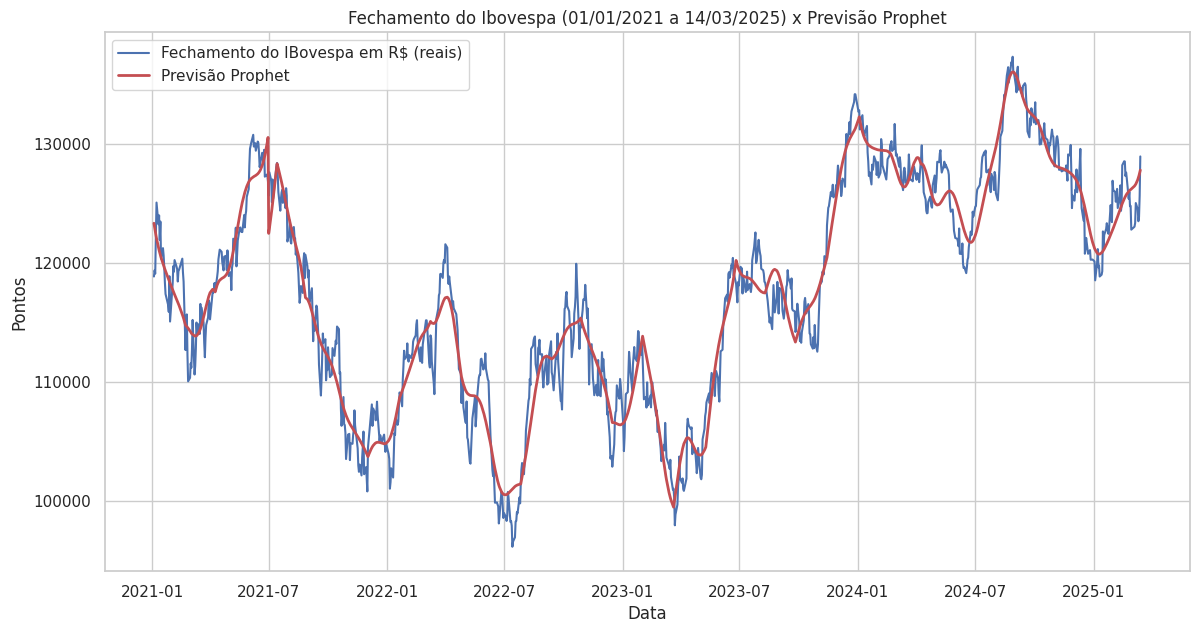

In [ ]:
# Plotando o resultado do modelo prophet x dados originais
# Calculando o wmape apenas dos ultimos 30 dias como foi feito nos modelos anteriores

forecast_prophet = forecast_prophet.merge(bovespa_fechamentos_modelo, on=['ds'], how='inner')

wmape_prophet = wmape(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))
mae_prophet = mean_absolute_error(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))
mape_prophet = mean_absolute_percentage_error(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))
mse_prophet = mean_squared_error(bovespa_fechamentos_modelo['y'].tail(30).values, forecast_prophet['yhat'].tail(30).values.round(3))




print(f"WMAPE: {wmape_prophet:.2%}")
print(f"MAPE: {mape_prophet:.2%}")
print(f"MAE: {mae_prophet}")
print(f"MSE: {mse_prophet}")



plt.figure(figsize=(14, 7))
plt.plot(bovespa_fechamentos_modelo['ds'], bovespa_fechamentos_modelo['y'], label="Fechamento do IBovespa em R$ (reais)")
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label="Previsão Prophet", color='r', linewidth=2)
plt.title("Fechamento do Ibovespa (01/01/2021 a 14/03/2025) x Previsão Prophet")
plt.xlabel("Data")
plt.ylabel("Pontos")
plt.legend()
plt.show()

#Previsão diária Final#

###**Previsão Final: Prevendo os próximos 90 dias**

* Identificação e Exclusão de Feriados
 * Criamos uma classe personalizada para armazenar os feriados nacionais que afetam a negociação na bolsa. Esses dias são excluídos da previsão para evitar distorções no modelo.

* Consideração do Impacto da COVID-19
 * Criamos um conjunto de dados identificando o período crítico da pandemia (março/2020 a junho/2021). O modelo aprende com essa informação e melhora a previsão em momentos de crise.

* Configuração do Modelo Prophet
 * Ajustamos o Prophet para incluir sazonalidade anual e consideramos os feriados como um fator de impacto.
 * Definimos sazonalidade multiplicativa para melhor capturar oscilações no Ibovespa.
 * Adicionamos um ajuste para mudanças de tendência no mercado (changepoint_prior_scale = 0.5), tornando o modelo mais sensível a variações repentinas.

* Inclusão de Sazonalidade e Regressores
 * Incorporamos uma sazonalidade diária para capturar padrões de curto prazo.
 * Adicionamos a variável "covid_impact" como regressor para que o modelo entenda eventos extraordinários.
 * Também incluímos feriados brasileiros pré-definidos para aprimorar a precisão.

* Treinamento e Previsão
 * Utilizamos a base de dados de treino mais otimizada.
 * Combinamos os dados históricos com o impacto da COVID-19 para gerar previsões mais realistas.
 * Criamos um conjunto de dados para prever os próximos 90 dias e incorporamos as variáveis adicionais.

* Avaliação e Visualização
 * Comparação das previsões do Prophet com os dados reais do Ibovespa.
 * Cálculo do WMAPE (Weighted Mean Absolute Percentage Error) para avaliar a precisão nos últimos 30 dias.
 * Geração de gráficos mostrando a tendência prevista, destacando a faixa de incerteza e a performance do modelo.

####**Conclusão:**
Os ajustes realizados aumentaram a sensibilidade do modelo Prophet a eventos críticos, como a pandemia e feriados. A inclusão da sazonalidade diária e da variável COVID-19 melhorou a precisão da previsão, tornando-a mais alinhada com a realidade do mercado financeiro. A avaliação final demonstrou que o modelo pode ser uma ferramenta útil e capaz de prever devidamente os próximos fechamentos do Ibovespa

In [ ]:
# Criando uma classe para armazenar os feriados, pois serão excluídos da nossa previsão

class B3Holidays(AbstractHolidayCalendar):
   rules = [
        Holiday("Confraternização Universal", month=1, day=1),
        Holiday("Carnaval1", month=3, day=3),  # Ajuste conforme o ano
        Holiday("Carnaval2", month=3, day=4),  # Ajuste conforme o ano
        Holiday("Sexta-feira Santa", month=4, day=7),
        Holiday("Tiradentes", month=4, day=21),
        Holiday("Dia do Trabalho", month=5, day=1),
        Holiday("Independência", month=9, day=7),
        Holiday("Nossa Senhora Aparecida", month=10, day=12),
        Holiday("Finados", month=11, day=2),
        Holiday("Proclamação da República", month=11, day=15),
        Holiday("Natal", month=12, day=25),
    ]

b3_holidays = B3Holidays().holidays(start='2015-01-01', end='2025-12-31')

In [ ]:
#Criando um DataFrame com as datas e um indicador para o período da COVID
covid_dates = pd.date_range(start='2020-03-01', end='2021-06-30', freq='B')  # Período crítico da pandemia
covid_df = pd.DataFrame({'ds': covid_dates, 'covid_impact': 1})

In [ ]:
# Vamos estanciar o modelo na variavel model_prophet

model_prophet_final = Prophet(weekly_seasonality=False,
                        daily_seasonality=False,
                        yearly_seasonality=True,
                        holidays=pd.DataFrame({'ds': b3_holidays, 'holiday': 'feriado'}),
                        seasonality_mode='multiplicative',
                        changepoint_prior_scale=1,
                        seasonality_prior_scale=0.5,
                        holidays_prior_scale=10.0)

#tratando sazonalidade
model_prophet_final.add_seasonality(name='daily', period=1, fourier_order=10)

#tratando COVID
model_prophet_final.add_regressor('covid_impact')
model_prophet_final.add_country_holidays(country_name='BR')

#Usamos a mesma base de treino que obtivemos os melhores resultados
treino_final=treino

#Juntando os dados de treino com o impacto da COVID
treino_final = treino_final.merge(covid_df, on='ds', how='left').fillna(0)

# Fazendo o treinamento do modelo
model_prophet_final.fit(treino_final)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/ahziuenp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeg161mjl/6ljkoy8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81365', 'data', 'file=/tmp/tmpeg161mjl/ahziuenp.json', 'init=/tmp/tmpeg161mjl/6ljkoy8b.json', 'output', 'file=/tmp/tmpeg161mjl/prophet_model4x72kaz_/prophet_model-20250323153722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:37:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Gerando as datas que serão usadas na previsão do modelo
future = model_prophet_final.make_future_dataframe(periods=90,freq='B')

# Adicionando a coluna 'covid_impact' ao conjunto de previsão
future = future.merge(covid_df, on='ds', how='left').fillna(0)

# Gerando as previsões
forecast_prophet_final = model_prophet_final.predict(future)

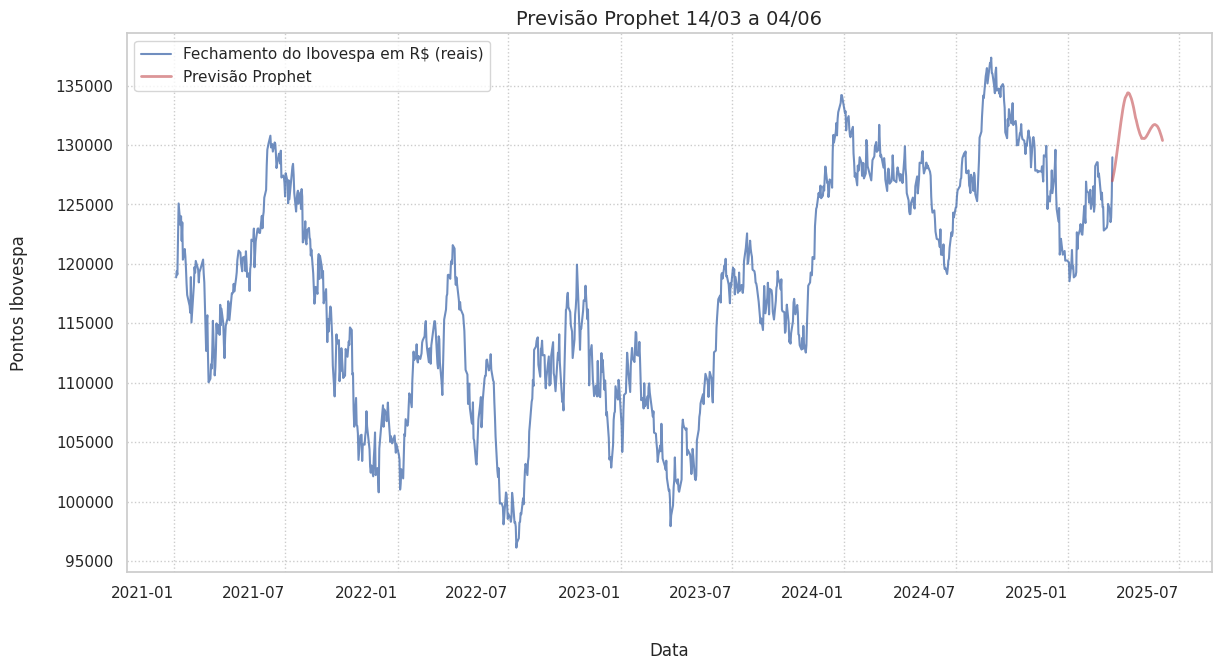

In [ ]:
# Gerando as datas que serão usadas na previsão do modelo
future = model_prophet_final.make_future_dataframe(periods=90,freq='B')

# Adicionando a coluna 'covid_impact' ao conjunto de previsão
future = future.merge(covid_df, on='ds', how='left').fillna(0)

# Gerando as previsões
forecast_prophet_final = model_prophet_final.predict(future)

# Plotando o resultado do modelo prophet x dados originais
# Calculando o wmape apenas dos ultimos 30 dias como foi feito nos modelos anteriores

forecast_prophet_final = forecast_prophet_final.merge(bovespa_fechamentos_modelo, on=['ds'], how='left')

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid")

# Criando a figura
plt.figure(figsize=(14, 7))

# Plotando os dados com Seaborn
sns.lineplot(x=bovespa_fechamentos_modelo['ds'],
             y=bovespa_fechamentos_modelo['y'],
             label="Fechamento do Ibovespa em R$ (reais)",
             color='b',
             alpha=0.8
             )

sns.lineplot(x=forecast_prophet_final['ds'].tail(59),
             y=forecast_prophet_final['yhat'].tail(59),
             label="Previsão Prophet",
             color='r',
             linewidth=2,
             alpha=0.6
             )

# Adicionando a faixa de incerteza
#plt.fill_between(
    #forecast_prophet_final['ds'].tail(59),
    #forecast_prophet_final['yhat_lower'].tail(59),
    #forecast_prophet_final['yhat_upper'].tail(59),
    #color='r',
    #alpha=0.2,  # Transparência para não poluir o gráfico
    #label="Intervalo de Confiança"
#)

# Títulos e rótulos
plt.title("Previsão Prophet 14/03 a 04/06", fontsize=14)
plt.xlabel("Data", fontsize=12, labelpad=30)
plt.ylabel("Pontos Ibovespa", fontsize=12, labelpad=20)
plt.legend()

# Ajustando a grade
plt.grid(True, linestyle=':', linewidth=1)

# Reduzindo o espaçamento dos quadrados do grid
plt.xticks(rotation=60, ha='right')  # Rotaciona os rótulos para melhor visualização
plt.locator_params(axis='x', nbins=15)  # Define mais divisões no eixo X
plt.locator_params(axis='y', nbins=15)  # Define mais divisões no eixo Y

# Formatando os valores do eixo X para ficarem mais legíveis
plt.xticks(rotation=0, ha='right')  # Rotaciona e alinha os valores à direita

# Exibir o gráfico
plt.show()

In [ ]:
# Exibindo também os valores previstos pelo modelo para os próximos 58 dias.
forecast_prophet_final[['ds','yhat']].tail(58)

,ds,yhat
1048,2025-03-17,127775.179473
1049,2025-03-18,128089.839913
1050,2025-03-19,128425.918580
1051,2025-03-20,128781.152342
1052,2025-03-21,129152.824241
1053,2025-03-24,130333.370581
1054,2025-03-25,130736.099984
1055,2025-03-26,131136.549413
1056,2025-03-27,131530.396303
1057,2025-03-28,131913.300826
